# Homework 5: Dimensionality Reduction and Clustering

For this homework I will be using the MNIST data set which plot is a set of images of hand-drawn digits, from zero through nine. Using this set I will do the following:
1. Use PCA to reduce the dimensionality
2. Use T-SNE to plot the first two components
3. Perform k-means clustering
4. Perfrorm hierarchical clustering

First I will import the basic necessary libraries and get the data from the sklearn datasets.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import json
import requests
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

In [20]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

Next I'll do a couple things to get a better understanding of the data, starting with the shape of the data and I'll also plot a few of the images to get an idea of what the data looks like. 

In [21]:
print (X.shape)

(70000, 784)


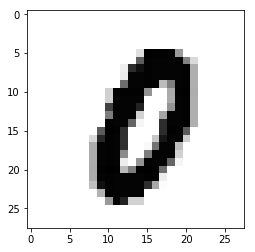

In [22]:
plt.imshow(X[2].reshape((28,28)), cmap='Greys')

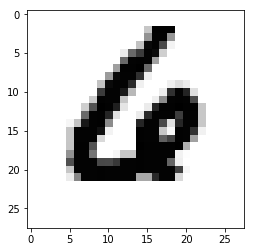

In [23]:
plt.imshow(X[40000].reshape((28,28)), cmap='Greys')

## 1. PCA
PCA is an acronym for principle component analysis. Basically it "projects our data onto the axes with the highest variance" according to Tyler's lecture. Thus it's an effective way to show any patterns in our dataset

In [24]:
from sklearn.decomposition import PCA

### A) How many components did you use and why?

I am going to find how many compenents I should use by using a method known as the explained variance ratio. According to Tyler's notebook, "this ratio is the fraction of the dataset's variance that lies along each principle component." Basically I am going to plot the variance that each compenent explains and then looks for an "elbow" in the graph which shows the number of compenents where the rate of reduction in variance will then decrease after. The following is my graph and I also plotted a black line where I thought the elbow was.

Text(0.5,1,'Explained Variance Ratio Method')

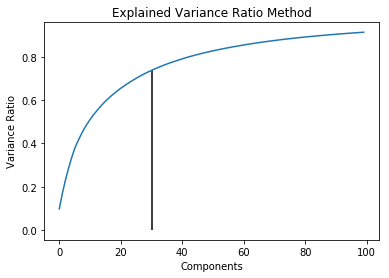

In [25]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[30],x=30)
plt.ylabel('Variance Ratio')
plt.xlabel('Components')
plt.title('Explained Variance Ratio Method')

Looks like I'll be using 30 components

### B) Plotting first two components

Text(0.5,1,'First Two Components for MNIST')

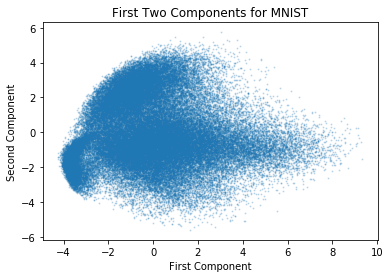

In [26]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
plt.scatter(X_2dim[:,0], X_2dim[:,1], marker='.', alpha=.2, s = 4)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('First Two Components for MNIST')

Above is the plot of the first two principal components against each other with the x-axis being the first and the y-axis being the second.

Hmmmm... Not really seeing a strong trend here. Looks like most of the points are concentrated towards the left of the graph but that's about it. Let's see what we can do with t-SNE in part 2.

### C. Why would you use PCA? What is it doing? And what are the drawbacks?

As stated before, PCA is an acronym for principle component analysis. Basically it "projects our data onto the axes with the highest variance" according to Tyler's lecture. Thus it's an effective way to show any patterns in our dataset

What it is doing is finding principle components using a matrix factorization called SVD which is the following:
$X = U\Sigma V^{T}$
Basically the first compenent is the axis that preserves the most variance and the second is the one orthogonal to the first that preserves the second most variance. 

PCA is great for compressing data and thus show patterns in a dataset. However it drops low variance components which drops data that could be important to our dataset. 

### D. Plot some of the images, then compress them using PCA and plot again

Lets grab those images I plotted before and use PCA to compress them.

Text(0.5,1,'Original Picture 1')

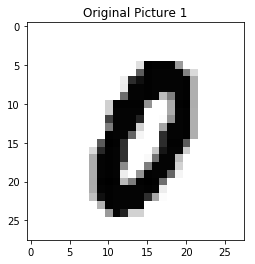

In [27]:
plt.imshow(X[2].reshape((28,28)), cmap='Greys')
plt.title('Original Picture 1')

Text(0.5,1,'Original Picture 2')

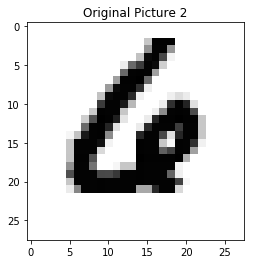

In [28]:
plt.imshow(X[40000].reshape((28,28)), cmap='Greys')
plt.title('Original Picture 2')

Text(0.5,1,'Transformed Image 1')

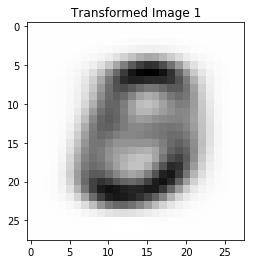

In [29]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
X_plt = pca.inverse_transform(X_2dim)

plt.imshow(X_plt[2].reshape((28,28)), cmap='Greys')
plt.title('Transformed Image 1')

Text(0.5,1,'Transformed Image 2')

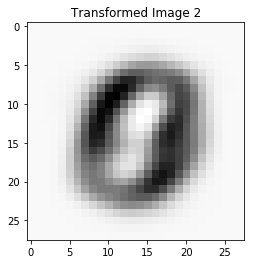

In [30]:
plt.imshow(X_plt[40000].reshape((28,28)), cmap='Greys')
plt.title('Transformed Image 2')

Well the zero looks a little more like a six now and the six looks a little more like a zero and both images are very blurry. Looks like PCA worked but compressing the images made them much more difficult to read as some information was removed.

## 2. T-SNE
T-SNE is a dimensiionality reductionn technique mainly used for data visualization as it takes high demensional data and then shows it in lower dimensions. For this reason, n_components is almost always 2 so that you can visualize your data in 2 dimensions. 

In [31]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.031s...
[t-SNE] Computed neighbors for 10000 samples in 8.907s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.711619
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.579185
[t-SNE] Error after 1000 iterations: 1.650827


Text(0.5,1,'First Two Components for MNIST (t-SNE)')

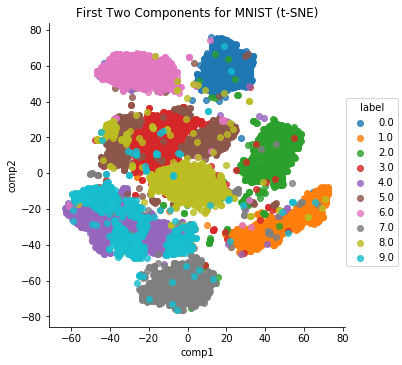

In [32]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('First Two Components for MNIST (t-SNE)')

### A. How does the plot above differ from the PCA plot?
There is a much more obvious trend in the t-sne plot compared to the PCA plot. It is fairly easy to see that each number is clustered together based on the color. 

### B. How robust is it to changes in perplexity?
So when playing with this model, I changed the perplexity a little and found that that plot definetely changed as perplexity increased suggesting that it's not very robust to changes in perplexity. 


In [33]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.042s...
[t-SNE] Computed neighbors for 10000 samples in 8.780s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.540864
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.701210
[t-SNE] Error after 1000 iterations: 1.754863


Text(0.5,1,'Change in Perplexity')

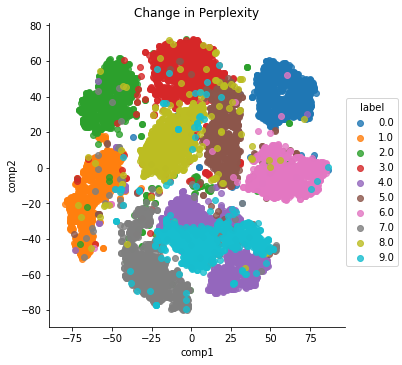

In [34]:

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('Change in Perplexity')

### C. How robust is it to different learning rate and number of iterations?
I tried t-ssne again but I changed the learning rate and iterations to test question C. Looking at the plot below, these factors make a huge difference so it's not very robust. 

In [62]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=250, learning_rate=100)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.039s...
[t-SNE] Computed neighbors for 10000 samples in 10.793s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.710106
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.269432
[t-SNE] Error after 251 iterations: 17976931348623157081452742373170435679807

Text(0.5,1,'Change in Iterations and Learning Rate')

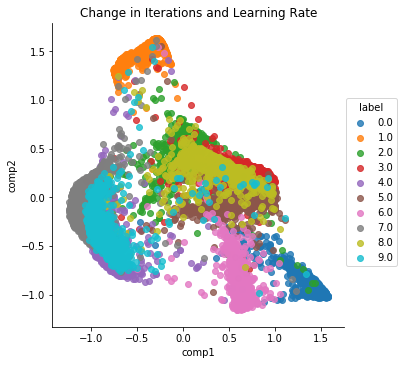

In [63]:

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('Change in Iterations and Learning Rate')

## 3. K-Means Clustering
Basically k-means works by finding a number (k) of clusters within the population based on the information given in our dataset. 

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### A. How did you choose k?
Using a method similar to the method used in part one, we will find k using the elbow method:
First we made a dataframe from our scaled and transformed data and then calcuated the SSES and made a plot.

In [44]:
X_scaled = preprocessing.scale(X)
X_scaled = shuffle(X_scaled)[0:3000]
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X_scaled)
df = pd.DataFrame({'1st':X_2dim[:,0], '2nd':X_2dim[:,1]})

Text(0.5,1,'Find K')

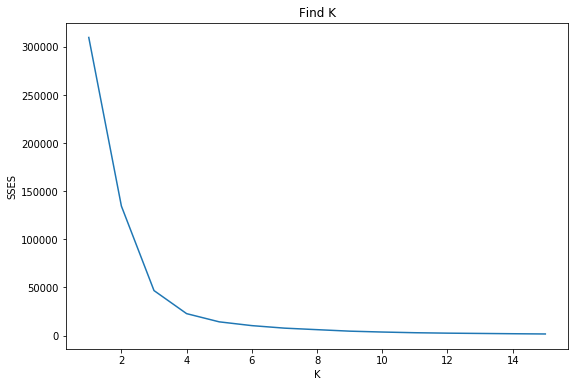

In [46]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=25, n_jobs=-1)
    kmeans.fit(df[['1st', '2nd']])
    sses.append(kmeans.inertia_)
    
# Create plot, including title and axis lables
fig = plt.figure(figsize=(9,6))
plt.plot(range(1,16), sses)    
plt.ylabel('SSES')
plt.xlabel('K')
plt.title('Find K')

### B. How did you evaluate your clustering?
I will evaluate the mean distance between a sample aclustering using the "the mean distance between a sample and all other points in the nearest cluster subtracted by the mean distance between a sample and all other points in the same class" (Tyler's lecture) which is called the silhouette coefficient. This coefficient is between -1 and 1 with 1 being better because a higher score means clusters have a greater distance between them. 

In [49]:
kmeans_model = KMeans(n_clusters=5, n_init=50, n_jobs=-1).fit(df[['1st', '2nd']])
labels = kmeans_model.labels_
silhouette_score(df[['1st', '2nd']], labels, metric='euclidean')

0.5542806418694001

### C. Visualizing clusters with t-sne 
Looks like there is major overlap between the clusters from our k-means clustering.

In [50]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_scaled)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.141s...
[t-SNE] Computed neighbors for 3000 samples in 15.379s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 4.190794
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.812920
[t-SNE] Error after 1000 iterations: 1.393420


Text(0.5,1,'t-SNE: First Two Components with K-Means Clustering Labels')

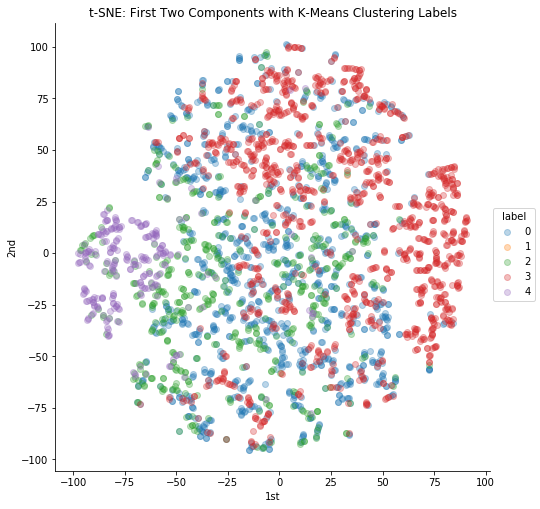

In [51]:
df_tsne = pd.DataFrame(tsne_results, columns=['1st', '2nd'])
df_tsne['label'] = labels

sns.lmplot(x='1st', y='2nd', data=df_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=7)
plt.title('t-SNE: First Two Components with K-Means Clustering Labels')

### D. Did you scale your data?
Yep! You can see how I did this in the section right before question A.
### E. How robust is your clustering?
I changed the iterations to 10 instead of 50, the plot below looks similar but with much more purple suggesting that it's not super robust

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.130s...
[t-SNE] Computed neighbors for 3000 samples in 12.909s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 4.190794
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.738762
[t-SNE] Error after 1000 iterations: 1.392108


Text(0.5,1,'Testing k-means clusters robustness')

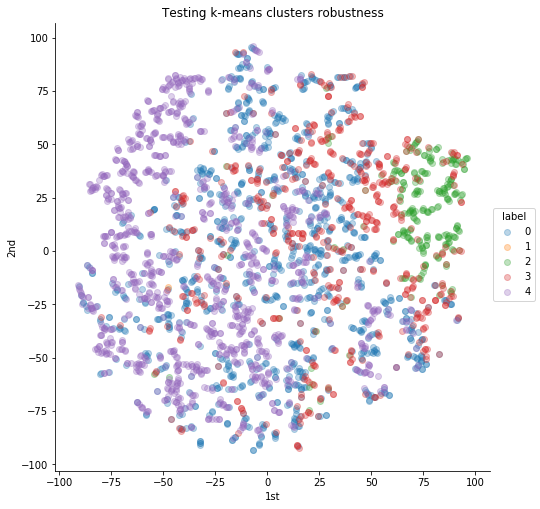

In [52]:
kmeans_model = KMeans(n_clusters=5, n_init=10, n_jobs=-1).fit(df[['1st', '2nd']])
labels = kmeans_model.labels_
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results = tsne.fit_transform(X_scaled)
df_tsne = pd.DataFrame(tsne_results, columns=['1st', '2nd'])
df_tsne['label'] = labels
sns.lmplot(x='1st', y='2nd', data=df_tsne, hue='label', fit_reg=False, scatter_kws={'alpha':0.3}, size=7)
plt.title('Testing k-means clusters robustness')

## 4. Hierarchical Clustering
Hierarchical clustering is simply another form of clustering that doesn't require a hyper-parameter k.

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

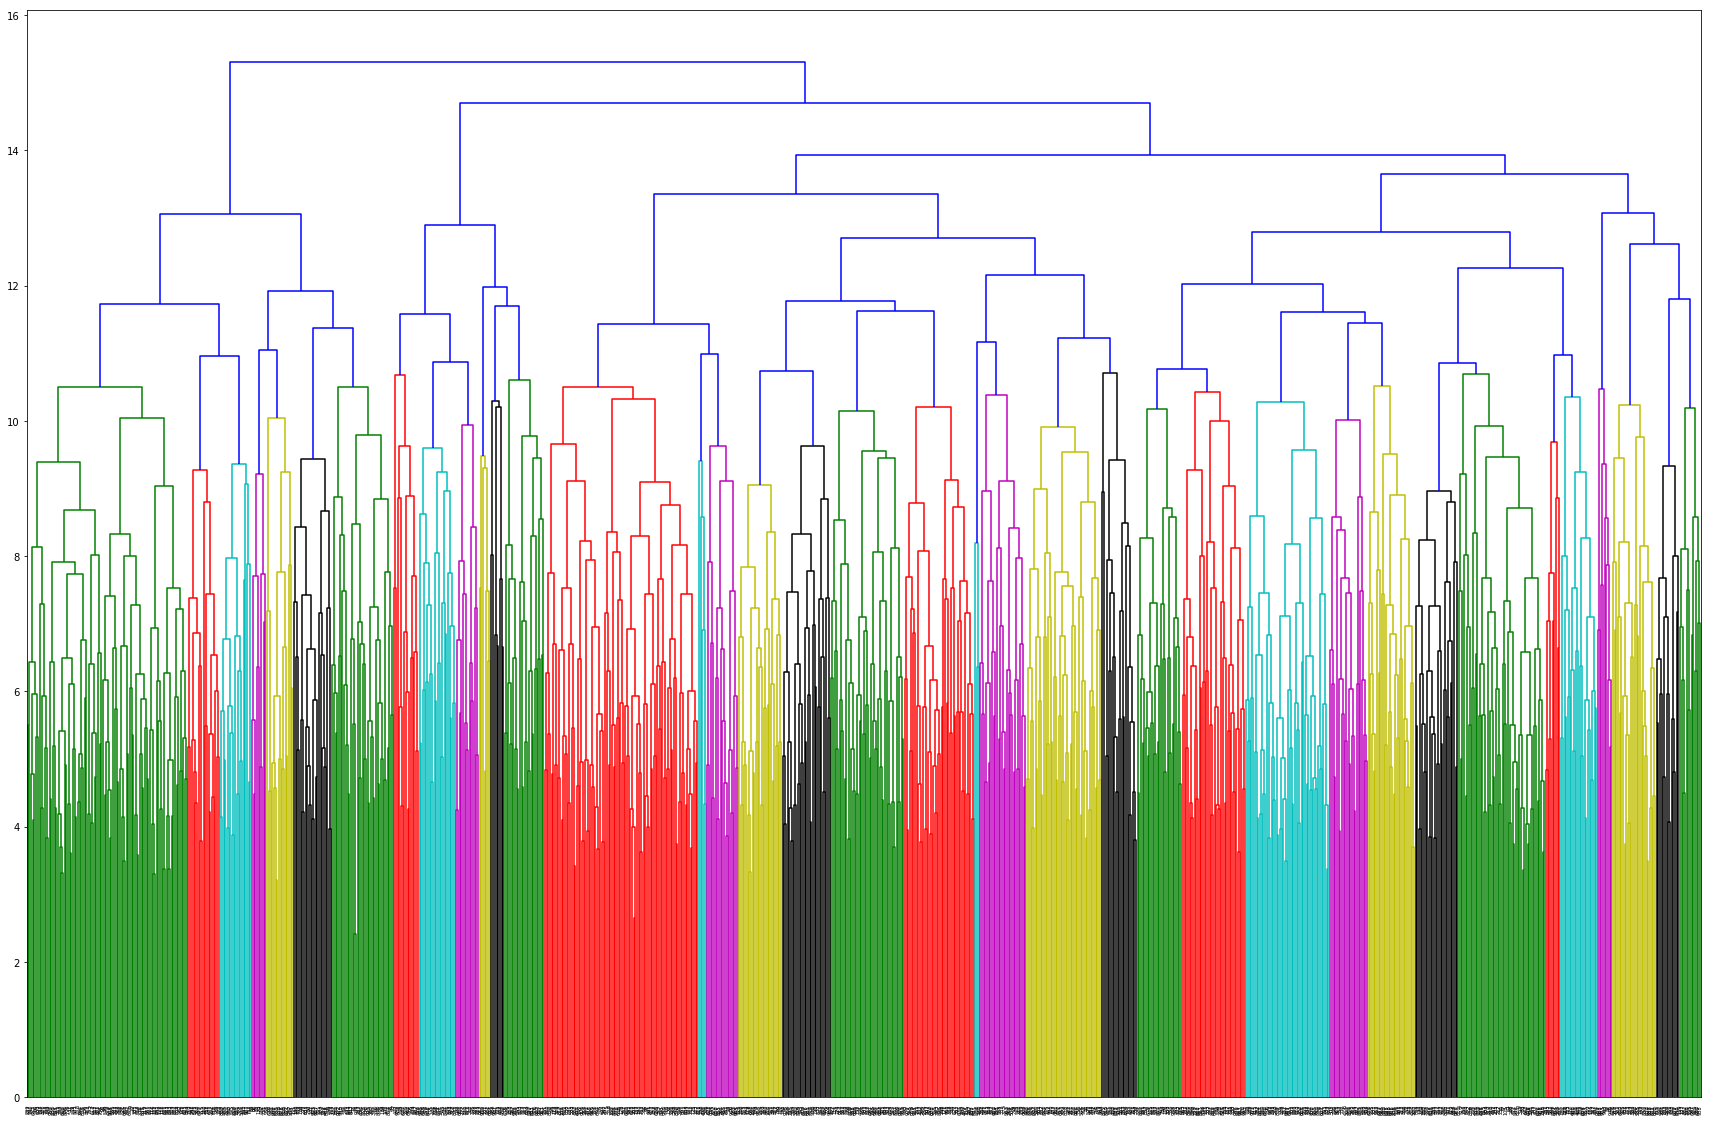

In [58]:
Z = linkage(X[0:1000], 'complete')
plt.figure(figsize=(30,20))
_ = dendrogram(Z)

### B. How many clusters seem reasonable based off your graph?

To find the number of clusters we want we draw a horizontal line at a y-axis value we think is reasonable and the number of verticle lines it crosses are the number of clusters we get. For example, if I draw a line at y=12, I get about 12 clusters. That seems reasonable for this dataset.

### C. How does your dendrogram change with different linkage methods?
For this I used two of the linkage methods that are avaliable on sklearn other than Complete which are Ward and Average. You can see these below. 

It looks like the changes in the dendrogram changes the linkage methods significantly. The Ward method is much more simple and clearly linked compared to the Average method while the Complete method before seems like somewhere in the middle between the two. 

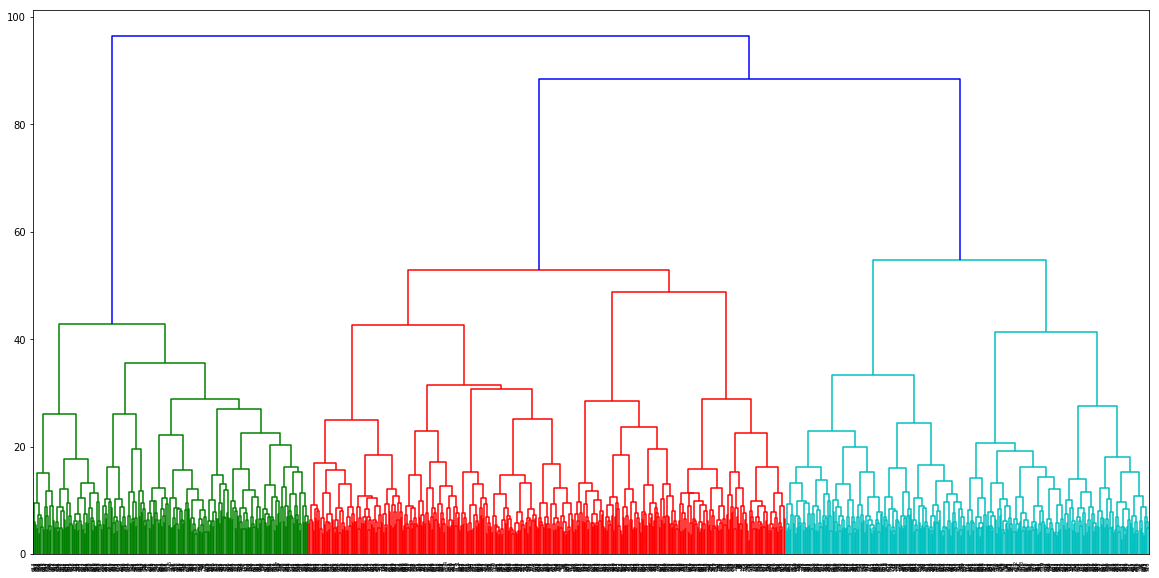

In [60]:
Z = linkage(X[0:1000], 'ward')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)

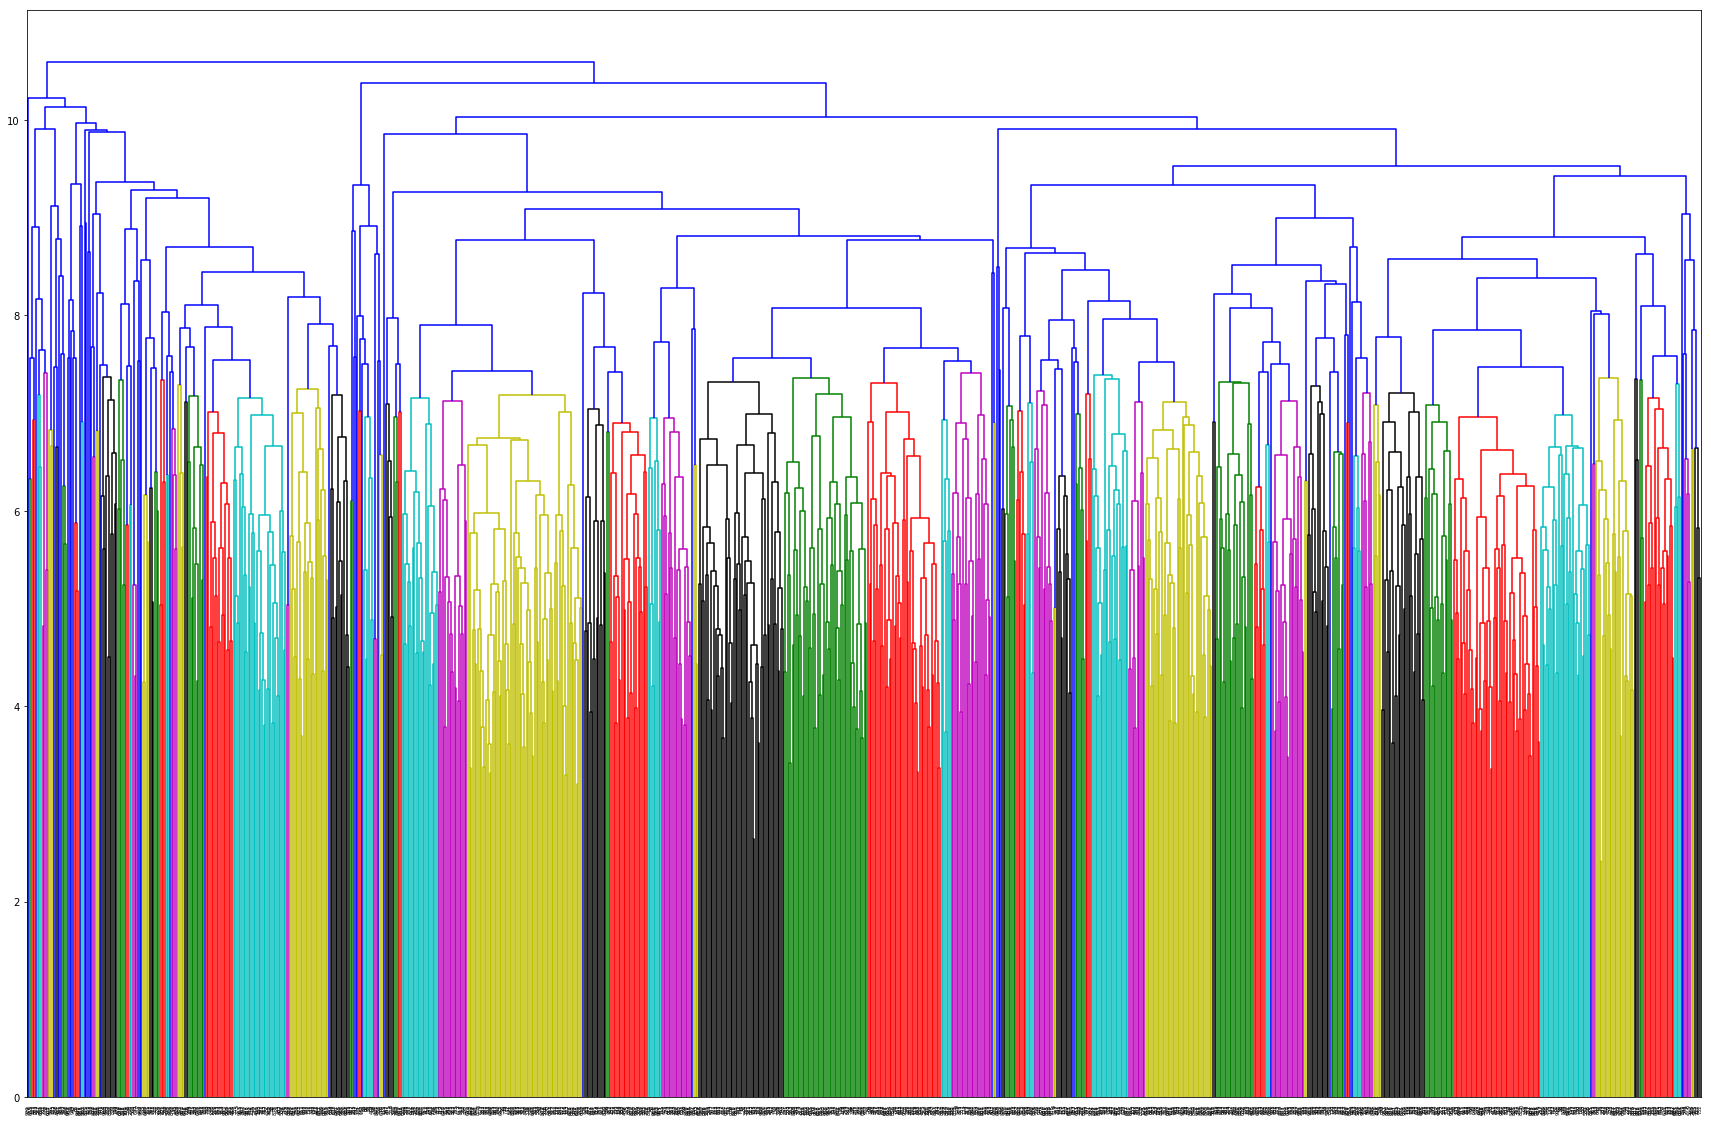

In [57]:
Z = linkage(X[0:1000], 'average')
plt.figure(figsize=(30, 20))
_ = dendrogram(Z)